Data Preprocessing:
1.	Import the necessary libraries and read the data.
2.	Drop any columns that you deem unecessary for analysis.
3.	The following columns need to be converted for further analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:

df = pd.read_csv('fifa.csv')
pd.set_option('display.max_columns',None)
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€1

In [3]:
df1 = pd.read_csv('fifa_ variable_information.csv')
df1.sort_values(by='ID')

,ID,unique id for every player
34,Acceleration,rating on scale of 100
1,Age,age
44,Aggression,rating on scale of 100
36,Agility,rating on scale of 100
38,Balance,rating on scale of 100
33,BallControl,rating on scale of 100
16,Body Type,body type of player
7,Club,current club
8,Club Logo,url to club logo
49,Composure,rating on scale of 100


In [4]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [5]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### 'Value' to numeric


-  Converting 'Value' to numeric . Creating a new column to ensure orginial data is maintained and can be used to verify as the new column shows value in millions and some places the value was given in thoousands(K). This shall keep things clear.

In [6]:
print('Null values:',df['Value'].isnull().sum())

Null values: 0


In [7]:
l=list()
count = 0
for i in df['Value']:
    if(i[-1]=='M'):
        if len(i)<3:
            i=i[1:]
        else:
            i=i[1:-1]
        l.append(float(i))
        
    else:
        if len(i)<3:
            i=i[1:]
        else:
            i=i[1:-1]
        i=(float(i)*1000)/1000000
        l.append(i)
        
    
df['Value_in_million']=l
df[['Value_in_million','Value']]



,Value_in_million,Value
0,110.50,€110.5M
1,77.00,€77M
2,118.50,€118.5M
3,72.00,€72M
4,102.00,€102M
...,...,...
18202,0.06,€60K
18203,0.06,€60K
18204,0.06,€60K
18205,0.06,€60K


--------------------------------------------------------------------------------------------------------------------------

#### Wage Conversion

- Converting 'Wage' to numeric . Creating a new column to ensure orginial data is maintained and can be used to verify as the new column shows value in thousands and some places the value could be in millions or even thousands(K) or less. This shall keep things clear.

In [9]:
print('Null values:',df['Wage'].isnull().sum())


Null values: 0


In [10]:
l1=list()
for i in df['Wage']:
    if(i[-1]=='K'):
        if len(i)<3:
            i=i[1:]
        else:
            i=i[1:-1]
        l1.append(float(i))
        
    else:
        if len(i)<3:
            i=i[1:]
        else:
            i=i[1:-1]
        i=(float(i)*1000)
        l1.append(i)

        
df['Wage_in_thousands']=l1
df[['Wage_in_thousands','Wage']]


,Wage_in_thousands,Wage
0,565.0,€565K
1,405.0,€405K
2,290.0,€290K
3,260.0,€260K
4,355.0,€355K
...,...,...
18202,1.0,€1K
18203,1.0,€1K
18204,1.0,€1K
18205,1.0,€1K


#### Release Clause Conversion

In [11]:
print('Null Values:',df['Release Clause'].isnull().sum())

Null Values: 1564


- Since there are null values, we''ll need to impute certain values as there could be a possibility that the value of Release clause may or may not affect other variables.

In [12]:
#converting null values to '-'

print(np.nan)
df['Release Clause'].fillna('-',inplace=True)


nan


In [13]:
# converting string values other than '-' to float.

l2 = list()
for i in df['Release Clause']:
    if(i[-1]=='M' and i != '-'):
        if len(i)<3:
            i=i[1:]
        else:
            i=i[1:-1]
        l2.append(float(i))
        
    elif i != '-':
        if len(i)<3:
            i=i[1:]
        else:
            i=i[1:-1]
        i=(float(i)*1000)/1000000
        l2.append(i)
    
    else:
        l2.append(i)
        


In [14]:
# using the median of the obtained float values to to impute in place of '-'. 
l3 =list()

for i in l2:
    if i != '-':
        l3.append(i)
        
s = pd.Series(l3)        
s.median()

l4 = list()
for j in l2:
    if j=='-':
        l4.append(s.median())
    else:
        l4.append(j)

df['Release Clause_millions']=l4
pd.set_option('display.max_rows',20)


In [15]:
df[['Release Clause_millions','Release Clause']]

,Release Clause_millions,Release Clause
0,226.500,€226.5M
1,127.100,€127.1M
2,228.100,€228.1M
3,138.600,€138.6M
4,196.400,€196.4M
...,...,...
18202,0.143,€143K
18203,0.113,€113K
18204,0.165,€165K
18205,0.143,€143K


#### 'Join' conversion

- Using 'Joined' to create a new column with just the year as int data type by converting 'Joined' to date format from string format and also replacing the null values with the medain of the not null values

In [16]:
import datetime
def convert(date_time):
    format = '%b %d, %Y' # The format
    datetime_str = datetime.datetime.strptime(date_time, format)
    return datetime_str

In [17]:

df['Joined'].fillna('Jan 1, 3000',inplace = True ) # imputing a superficial value for year e.g: 3000

#############################################

list_year = list()
for i in df['Joined']:  # creating a list with all year values as integer values
    if i != np.nan:
        a = convert(i).date().year
        list_year.append(int(a))
        
#############################################

df['Joined_int_year'] = list_year  #creating a new column with years as int 
list_year2 = list()

############################################

for i in list_year: # replacing the imputed value with the median of the remaining values i.e,2017.
    if i != 3000:
        list_year2.append(i)
        
        
y = pd.Series(list_year2)


#imputed value of 3000 being replaced with median of the remaining values

df['Joined_int_year'].replace(3000,int(y.median()),inplace=True)
df[['Joined_int_year']]



,Joined_int_year
0,2004
1,2018
2,2017
3,2011
4,2015
...,...
18202,2017
18203,2018
18204,2017
18205,2018


In [18]:
df['Contract Valid Until'].isnull().sum()

289

In [19]:
df['Contract Valid Until'].fillna('no',inplace=True)

##############################################


list_contract = list()
list_contract2 = list()

for i in df['Contract Valid Until']:
    if i != 'no':
        if len(i)>4:
            i = i[-4:]
            list_contract.append(int(i))
            list_contract2.append(int(i))
        else:
            list_contract.append(int(i))
            list_contract2.append(int(i))
            
    else:
        list_contract.append(i)


df['Contract Valid Until_int']=list_contract

#############################################

cvu = pd.Series(list_contract2)

df['Contract Valid Until_int'].replace('no',round(cvu.median()),inplace=True) 
 
df[['Contract Valid Until_int','Contract Valid Until']]

,Contract Valid Until_int,Contract Valid Until
0,2021,2021
1,2022,2022
2,2022,2022
3,2020,2020
4,2023,2023
...,...,...
18202,2019,2019
18203,2020,2020
18204,2021,2021
18205,2019,2019


#### Height conversion to float and removing special symbols

In [20]:
df['Height'].isnull().sum()

48

In [21]:
df['Height'].fillna('--',inplace=True)

############################
l_height = list()
l_height2 =list()

for i in df['Height']:
    if "'" in i:
        a = i.index("'")
        j = (float(i[0:a])*12) + (float(i[a+1:]))
        l_height.append(j)
        l_height2.append(j)
    
    else:
        l_height.append(i)

df['Height_float'] = l_height

##########################

h = pd.Series(l_height2)
df['Height_float'].replace('--',round(h.median(),2),inplace=True)

df[['Height_float','Height']]

,Height_float,Height
0,67.0,5'7
1,74.0,6'2
2,69.0,5'9
3,76.0,6'4
4,71.0,5'11
...,...,...
18202,69.0,5'9
18203,75.0,6'3
18204,68.0,5'8
18205,70.0,5'10


#### Weight converion to float and removing suffixes

In [22]:
df['Weight'].isnull().sum()

48

In [23]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [24]:
df['Weight'].fillna('xx',inplace=True)

#################################

lw = list()
lw2 = list()

for i in df['Weight']:
    if i != 'xx':
        lw.append(float(i[:-3]))
        lw2.append(float(i[:-3]))
    else:
        lw.append(i)

df['Weight_float'] = lw

################################

w = pd.Series(lw2)
df['Weight_float'].replace('xx',round(w.median(),2),inplace=True)

###############################
 
df[['Weight_float','Weight']]


,Weight_float,Weight
0,159.0,159lbs
1,183.0,183lbs
2,150.0,150lbs
3,168.0,168lbs
4,154.0,154lbs
...,...,...
18202,134.0,134lbs
18203,170.0,170lbs
18204,148.0,148lbs
18205,154.0,154lbs


1. Plot the distribution of Overall rating for all players. 

In [25]:
type(df['Overall'][0])

numpy.int64

In [26]:
df['Overall'].isnull().sum()

0

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


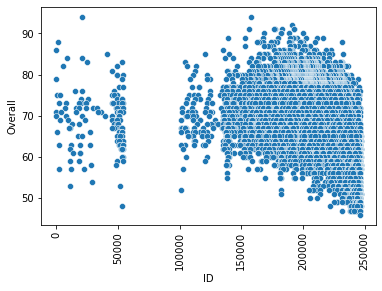

In [27]:
sns.scatterplot(df['ID'],df['Overall'])
plt.xticks(rotation=90)
plt.show()


2.	Generate pair plots for the following variables:

Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [28]:
df['International Reputation'].isnull().sum()

48

In [29]:
df['International Reputation'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    4.0
Name: International Reputation, dtype: float64

In [30]:
df['International Reputation'].fillna(df['International Reputation'].median(),inplace=True)

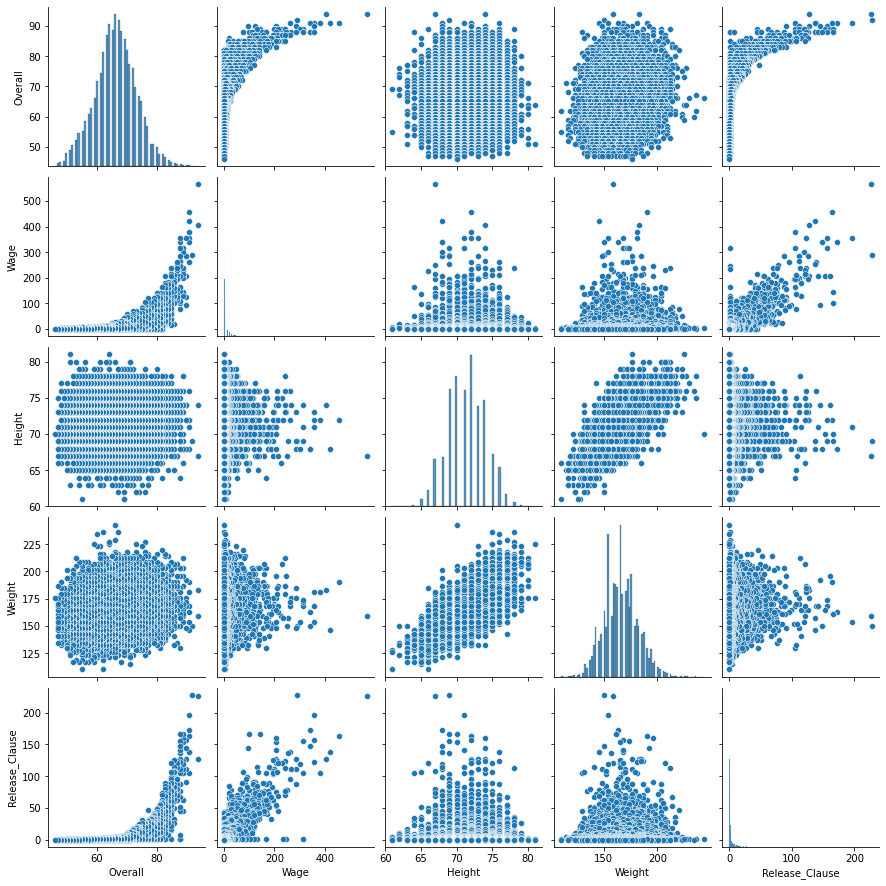

In [31]:
df2 = pd.DataFrame({'Overall':df['Overall'],'Wage':df['Wage_in_thousands'],'Height':df['Height_float'],
                    'Weight':df['Weight_float'],'Release_Clause':df['Release Clause_millions']})
sns.pairplot(df2)

3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

    a)	What would the average wage for this set of players be?

    b)	What is the average age?

    c)	Is there a correlation between the Overall rating and Value for these players?


In [32]:
trial_table = df[df['Contract Valid Until_int']==2020].sort_values(by='Overall',ascending=False)[:20]
trial_table

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value_in_million,Wage_in_thousands,Release Clause_millions,Joined_int_year,Contract Valid Until_int,Height_float,Weight_float
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,72.0,260.0,138.6,2011,2020,76.0,168.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,Right,4.0,4.0,4.0,High/ High,Lean,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,67.0,420.0,137.4,2012,2020,68.0,146.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€51M,€380K,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,15.0,"Aug 1, 2005",NaN,2020,6'0,181lbs,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,51.0,380.0,104.6,2005,2020,72.0,181.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,93.0,340.0,172.1,2012,2020,68.0,163.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€60M,€285K,Left,4.0,2.0,4.0,High/ Medium,Normal,LCM,21.0,"Jul 14, 2010",NaN,2020,5'8,148lbs,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M,60.0,285.0,111.0,2010,2020,68.0,148.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€60M,€200K,Right,4.0,4.0,3.0,High/ High,Lean,LS,21.0,"Jul 16, 2013",NaN,2020,6'1,170lbs,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,€111M,60.0,200.0,111.0,2013,2020,73.0,170.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€27M,€215K,Left,4.0,3.0,2.0,Medium/ High,Normal,LCB,3.0,"Jul 1, 2005",NaN,2020,6'2,187lbs,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,

In [33]:
#What would the average wage for this set of players be?

print('Average Wage:',trial_table['Wage_in_thousands'].mean(),'thousand Euros')

Average Wage: 205.45 thousand Euros


In [34]:
#What is the average age?
trial_table['Age'].isnull().sum()

0

In [35]:
print('Average age:',trial_table['Age'].mean(),'years')

Average age: 30.65 years


C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


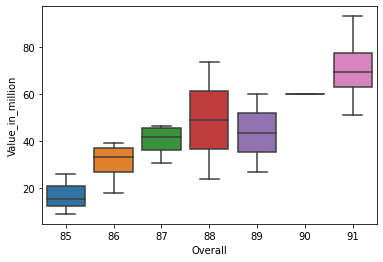

In [36]:
#c) Is there a correlation between the Overall rating and Value for these players?

sns.boxplot(trial_table['Overall'],trial_table['Value_in_million'])
plt.show()

4.	Generate tables containing the top 5 players by Overall rating for each unique position.
    
    a)	Are there any players appearing in more than one Table. Please point out such players.
    
    b)	What is the average wage one can expect to pay for the top 5 in every position?


In [38]:
# a) Are there any players appearing in more than one Table. Please point out such players.


p = df['Position'].unique()
p

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

P. Kadeřábek       1
J. Kimmich         1
Douglas Costa      1
D. Caligiuri       1
Bruno Fernandes    1
                  ..
Nicolás Formido    1
M. ter Stegen      1
J. Hector          1
E. Hazard          1
F. de Jong         1
Name: Name, Length: 135, dtype: int64


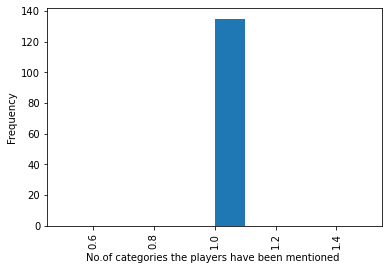

In [53]:
t1 = df[df['Position']=='RF'].sort_values(by='Overall',ascending=False)[:5]

for i in p:
    t2 = df[df['Position']== i].sort_values(by='Overall',ascending=False)[:5]
    t1 = pd.concat([t1,t2])
    
t1 = t1[5:] #removing the duplicate rows


print(t1['Name'].value_counts())
t1['Name'].value_counts().plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('No.of categories the players have been mentioned ')
plt.show()


- There is no player in the top 5 of each category that is appearing in more than one category.


In [54]:
# b) What is the average wage one can expect to pay for the top 5 in every position?

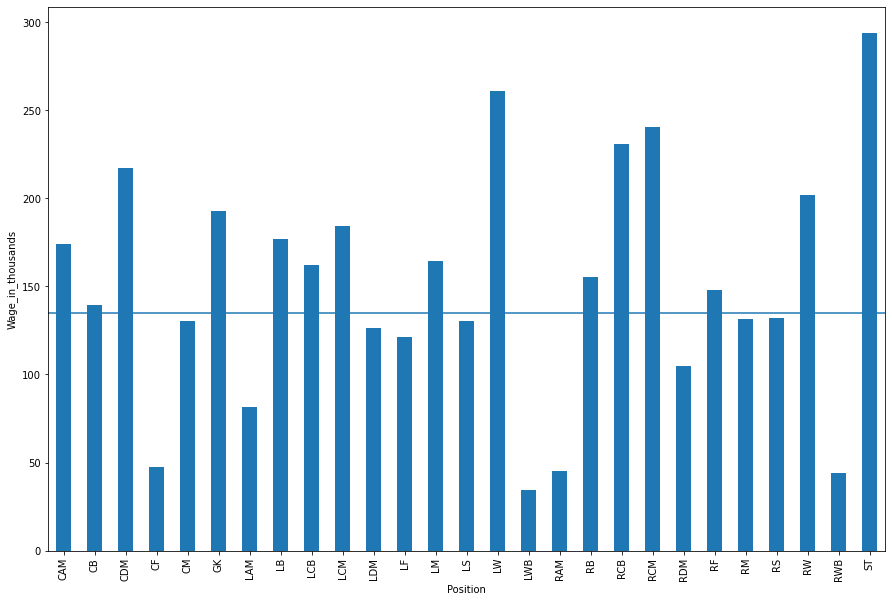

In [57]:
t1.groupby('Position')['Wage_in_thousands'].mean().plot(kind= 'bar',figsize=(15,10))
plt.ylabel('Wage_in_thousands')
plt.axhline(t1['Wage_in_thousands'].median())
plt.show()